Nama : AHMAD HASANUDDIN

## Project Overview

Sistem rekomendasi film adalah sebuah sistem yang bertujuan untuk memberikan rekomendasi film kepada penonton atau pengguna berdasarkan preferensi mereka, seperti yang dapat ditemukan di platform seperti Netflix, iQIYI, dan WeTV. Sistem rekomendasi ini dirancang berdasarkan kesukaan pengguna di masa lalu serta penilaian terhadap film tersebut.

Dalam beberapa tahun terakhir, sistem rekomendasi telah menjadi populer karena kemampuannya mengatasi masalah kelebihan informasi dengan menyarankan produk yang paling relevan dari sejumlah besar data. Khusus untuk media, sistem rekomendasi film berbasis kolaborasi online bertujuan membantu pengguna menemukan film yang sesuai dengan preferensi mereka melalui analisis kesamaan antara pengguna atau film berdasarkan peringkat historis. Namun, tantangan muncul karena kelangkaan data, yang membuat pemilihan tetangga semakin sulit seiring bertambahnya jumlah film dan pengguna dengan cepat.

Proyek ini mengusulkan sistem rekomendasi film berbasis model hibrida yang menggabungkan algoritma pengelompokan K-means yang telah ditingkatkan dengan algoritma genetika (GA). Sistem ini mempartisi ruang pengguna yang telah ditransformasi, serta memanfaatkan analisis komponen utama (PCA) untuk mereduksi dimensi ruang populasi film, sehingga mengurangi kompleksitas komputasi. Hasil eksperimen menggunakan dataset Movielens menunjukkan bahwa pendekatan ini mampu memberikan tingkat akurasi yang tinggi dan menghasilkan rekomendasi film yang lebih personal dan andal dibandingkan metode tradisional.

Detail lebih lanjut mengenai proyek ini dapat diakses melalui artikel berikut:
[Journal of Visual Languages & Computing](https://www.sciencedirect.com/science/article/abs/pii/S1045926X14000901)

## Business Understanding

### Problem Statements

1. Bagaimana cara merekomendasikan film yang disukai oleh pengguna tertentu agar dapat juga direkomendasikan kepada pengguna lainnya?

### Goals

Membangun sistem rekomendasi yang akurat berdasarkan penilaian (ratings) dan aktivitas user.

### Solution approach

Solusi yang diusulkan memanfaatkan dua algoritma Machine Learning untuk sistem rekomendasi, yaitu:

- **Content Based Filtering** aAlgoritma ini merekomendasikan item yang serupa dengan preferensi pengguna berdasarkan aktivitas sebelumnya atau umpan balik eksplisit.
- **Collaborative Filtering**.Algoritma ini memanfaatkan pendapat kolektif dari komunitas pengguna tanpa memerlukan atribut khusus untuk setiap item.

Dalam implementasinya, algoritma Content-Based Filtering digunakan untuk merekomendasikan film berdasarkan aktivitas pengguna sebelumnya, sedangkan Collaborative Filtering digunakan untuk merekomendasikan film dengan peringkat (rating) tertinggi dari komunitas pengguna.

Install opendatasets yaitu library untuk mendownload dataset


In [5]:
!pip install opendatasets


Import library opendatasets

In [6]:
import opendatasets as od

## Data Understanding


Dataset yang digunakan dalam proyek machine learning ini adalah **Movie Recommendation Data** yang diperoleh dari situs Kaggle. Bisa mengakses dataset tersebut melalui tautan berikut [movie-recommendation-data](https://www.kaggle.com/rohan4050/movie-recommendation-data).

download dataset yang dibutuhkan, dengan menambah baris code seperti berikut :

In [19]:
od.download('https://www.kaggle.com/rohan4050/movie-recommendation-data?select=ml-latest-small')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ahmadhasanuddin
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/rohan4050/movie-recommendation-data


100%|██████████| 13.1M/13.1M [00:00<00:00, 81.3MB/s]

Selanjutnya, baca data-data di atas dengan menggunakan fungsi pandas.read_csv

In [47]:
import pandas as pd

links = pd.read_csv('/content/movie-recommendation-data/ml-latest-small/links.csv')
movies = pd.read_csv('/content/movie-recommendation-data/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/movie-recommendation-data/ml-latest-small/ratings.csv')
tags = pd.read_csv('/content/movie-recommendation-data/ml-latest-small/tags.csv')

print('Jumlah data link movie : ', len(links.movieId.unique()))
print('Jumlah data movie : ', len(movies.movieId.unique()))
print('Jumlah data ratings dari user : ', len(ratings.userId.unique()))
print('Jumlah data ratings dari user : ', len(ratings.movieId.unique()))
print('Jumlah data : ', len(tags.movieId.unique()))


Jumlah data link movie :  9742
Jumlah data movie :  9742
Jumlah data ratings dari user :  610
Jumlah data ratings dari user :  9724
Jumlah data :  1572


### Univariate Exploratory Data Analysis
Variabel-variabel pada movie-recommendation-data adalah sebagai berikut :

- links : daftar link movie tersebut.
- movies : daftar movie yang tersedia.
- ratings : daftar penilaian yang diberikan pengguna terhadap movie.
- tags : daftar key word dari movie tersebut


####  Link Variabel
Eksplorasi variabel *links* merujuk pada daftar tautan yang mengarah ke film-film tersebut.

In [48]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


####  movies Variabel
Eksplorasi variabel *movies* mengacu pada daftar film yang tersedia.

In [49]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


#### Ratings
Eksplorasi data yang akan diterapkan pada model mencakup data rating.

In [50]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


cek nilai data dari data ratings

In [51]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Dari output di atas, diketahui bahwa nilai maksimum ratings adalah 5 dan nilai minimumnya adalah 0.5. Artinya, skala rating berkisar antara 0.5 hingga 5.

## Data Preprocessing


### Menggabungkan Movie
menggabungkan beberapa file dengan fungsi concatenate berdasarkan pada movieId, gabungkan seluruh data pada variabel movie_all





In [52]:
import numpy as np

# Menggabungkan seluruh movieID pada kategori movie
movie_all = np.concatenate((
    links.movieId.unique(),
    movies.movieId.unique(),
    ratings.movieId.unique(),
    tags.movieId.unique(),
))

# Mengurutkan data dan menghapus data yang sama
movie_all = np.sort(np.unique(movie_all))

print('Jumlah seluruh data movie berdasarkan movieID: ', len(movie_all))

Jumlah seluruh data movie berdasarkan movieID:  9742


### Menggabungkan Seluruh User
menggabungkan beberapa file dengan fungsi concatenate berdasarkan pada userId, gabungkan seluruh data pada variabel user_all

In [53]:
# Menggabungkan seluruh userId
user_all = np.concatenate((
    ratings.userId.unique(),
    tags.userId.unique(),

))

# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  610


Menggabungkan file links, movies, ratingsm tags ke dalam dataframe movie_info. Serta menggabungkan dataframe ratings dengan movie_info berdasarkan nilai movieId

In [54]:
movie_info = pd.concat([links, movies, ratings, tags])
movie = pd.merge(ratings, movie_info , on='movieId', how='left')
movie

,userId_x,movieId,rating_x,timestamp_x,imdbId,tmdbId,title,genres,userId_y,rating_y,timestamp_y,tag
0,1,1,4.0,964982703,114709.0,862.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN,NaN
2,1,1,4.0,964982703,NaN,NaN,NaN,NaN,1.0,4.0,9.649827e+08,NaN
3,1,1,4.0,964982703,NaN,NaN,NaN,NaN,5.0,4.0,8.474350e+08,NaN
4,1,1,4.0,964982703,NaN,NaN,NaN,NaN,7.0,4.5,1.106636e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6359580,610,170875,3.0,1493846415,4630562.0,337339.0,NaN,NaN,NaN,NaN,NaN,NaN
6359581,610,170875,3.0,1493846415,NaN,NaN,The Fate of the Furious (2017),Action|Crime|Drama|Thriller,NaN,NaN,NaN,NaN
6359582,610,170875,3.0,1493846415,NaN,NaN,NaN,NaN,50.0,1.0,1.514498e+09,NaN
6359583,610,170875,3.0,1493846415,NaN,NaN,NaN,NaN,249.0,3.0,1.505165e+09,NaN


seperti yang dilihat dari hasil diatas terdapat banyak sekali missing value maka lakukan cek missing value


In [55]:
movie.isnull().sum()

,0
userId_x,0
movieId,0
rating_x,0
timestamp_x,0
imdbId,6258749
tmdbId,6258762
title,6258749
genres,6258749
userId_y,201672
rating_y,434885


menggabungkan rating berdasarkan movieId

In [56]:
movie.groupby('movieId').sum()

,userId_x,rating_x,timestamp_x,imdbId,tmdbId,title,genres,userId_y,rating_y,timestamp_y,tag
movieId,,,,,,,,,,,
1,14498880,185460.0,53441180205380,24662435.0,185330.0,Toy Story (1995)Toy Story (1995)Toy Story (199...,Adventure|Animation|Children|Comedy|FantasyAdv...,14465415.0,181245.0,5.304394e+13,pixarpixarfunpixarpixarfunpixarpixarfunpixarpi...
2,4205116,43790.0,14492875665352,12484670.0,972840.0,Jumanji (1995)Jumanji (1995)Jumanji (1995)Juma...,Adventure|Children|FantasyAdventure|Children|F...,4060210.0,41525.0,1.437287e+13,fantasymagic board gameRobin Williamsgamefanta...
3,825832,9492.0,2926881125616,5887856.0,811304.0,Grumpier Old Men (1995)Grumpier Old Men (1995)...,Comedy|RomanceComedy|RomanceComedy|RomanceCome...,796900.0,8814.0,2.836734e+12,moldyoldmoldyoldmoldyoldmoldyoldmoldyoldmoldyo...
4,13851,148.5,56610468432,804195.0,219499.0,Waiting to Exhale (1995)Waiting to Exhale (199...,Comedy|Drama|RomanceComedy|Drama|RomanceComedy...,10773.0,115.5,4.403036e+10,0
5,777987,7976.5,2577949287482,5539009.0,581238.0,Father of the Bride Part II (1995)Father of th...,ComedyComedyComedyComedyComedyComedyComedyCome...,765723.0,7374.5,2.494850e+12,pregnancyremakepregnancyremakepregnancyremakep...
...,...,...,...,...,...,...,...,...,...,...,...
193581,552,12.0,4611327246,5476944.0,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09,0
193583,552,10.5,4611328635,5914996.0,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09,0
193585,552,10.5,4611329415,6397426.0,479308.0,Flint (2017),Drama,184.0,3.5,1.537110e+09,0


### Menggabungkan Data dengan Fitur Nama Movie

mendefinisikan variabel all_movie_rate dengan variabel ratings

In [57]:
all_movie_rate = ratings
all_movie_rate

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Menggabungkan all movie_rate dengan dataframe movies berdasarkan movieId

In [58]:
all_movie_name = pd.merge(all_movie_rate, movies[['movieId','title','genres']], on='movieId', how='left')
all_movie_name

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


Menggabungkan dataframe tags dengan all_movie_name berdasarkan movieId dan memasukkannya ke dalam variabel all_movie

In [59]:
# Menggabungkan dataframe genres dengan all_movie_name dan memasukkannya ke dalam variabel all_movie
all_movie = pd.merge(all_movie_name, tags[['movieId','tag']], on='movieId', how='left')
all_movie

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking
285760,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,predictible plot


## Data Preparation


### Mengatasi Missing Value
Mencari data apakah ada data kosong atau tidak

In [60]:
all_movie.isnull().sum()


,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0
tag,52549


ternyata dari data diatas terdapat data kosong pada kolom tag yaitu 52549, maka dilakukanlah pembersihan missing value dengan fungsi dropna()

In [61]:
all_movie_clean = all_movie.dropna()
all_movie_clean

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285756,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,dark
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking


data di atas beruabh menjadi 233213 baris yang awalnya 285762 baris.
cek kembali missing value pada variabel all_movie_clean


In [62]:
all_movie_clean.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0
tag,0


Mengurutkan movie berdasarkan movieId kemudian memasukkannya ke dalam variabel fix_movie

In [63]:
fix_movie = all_movie_clean.sort_values('movieId', ascending=True)
fix_movie

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121430,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121431,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121432,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
35190,73,1,4.5,1464196374,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
263644,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster


Mengecek berapa jumlah fix_movie

In [64]:
len(fix_movie.movieId.unique())

1554

Membuat variabel preparation yang berisi dataframe fix_movie kemudian mengurutkan berdasarkan movieId

In [65]:
preparation = fix_movie
preparation.sort_values('movieId')

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44427,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
44426,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44425,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
209733,453,1,5.0,1005966797,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
191470,414,187595,3.5,1527977920,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy


Selanjutnya, gunakan data unik untuk dimasukkan ke dalam proses pemodelan.
serta hapus data duplicate dengan fungsi drop_duplicates() berdasarkan movieId

In [66]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
187260,414,2,3.0,961594981,Jumanji (1995),Adventure|Children|Fantasy,fantasy
106951,240,3,4.0,849122858,Grumpier Old Men (1995),Comedy|Romance,old
19921,45,5,3.0,959625102,Father of the Bride Part II (1995),Comedy,pregnancy
115692,262,7,3.0,840306238,Sabrina (1995),Comedy|Romance,remake
...,...,...,...,...,...,...,...
27632,62,183611,4.0,1526244681,Game Night (2018),Action|Comedy|Crime|Horror,Comedy
174264,380,184471,3.0,1536872748,Tomb Raider (2018),Action|Adventure|Fantasy,Alicia Vikander
44721,98,187593,5.0,1532457913,Deadpool 2 (2018),Action|Comedy|Sci-Fi,sarcasm
263643,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,Emilia Clarke


Selanjutnya,  melakukan konversi data series menjadi list. Dalam hal ini, menggunakan fungsi tolist() dari library numpy. Implementasikan

In [67]:
# Mengonversi data series ‘movieId’ menjadi dalam bentuk list
movie_id = preparation['movieId'].tolist()

# Mengonversi data series ‘title’ menjadi dalam bentuk list
movie_name = preparation['title'].tolist()

# Mengonversi data series ‘genres’ menjadi dalam bentuk list
movie_genre = preparation['genres'].tolist()

print(len(movie_id))
print(len(movie_name))
print(len(movie_genre))

1554
1554
1554


membuat dictionary untuk menentukan pasangan key-value pada data movie_id, movie_name, dan movie_genre yang telah disiapkan sebelumnya.

In [68]:
# Membuat dictionary untuk data ‘movie_id’, ‘movie_name’, dan ‘movie_genre’
movie_new = pd.DataFrame({
    'id': movie_id,
    'movie_name': movie_name,
    'genre': movie_genre
})
movie_new

,id,movie_name,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,7,Sabrina (1995),Comedy|Romance
...,...,...,...
1549,183611,Game Night (2018),Action|Comedy|Crime|Horror
1550,184471,Tomb Raider (2018),Action|Adventure|Fantasy
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi
1552,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi


## Modeling and Result

- Proses modeling yang saya lakukan pada data ini adalah dengan membuat algoritma machine learning, yaitu content based filtering dan collabrative filtering. untuk algoritma content based filtering saya buat dengan apa yang disukai pengguna pada masa lalu, sedangkan untuk content based filtering, saya buat dengan memanfaatkan tingkat rating dari movie tersebut.


1. Model Development dengan Content Based Filtering


 menggukan fungsi TFIDFVectorizer()


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(movie_new['genre'])

# Mapping array dari fitur index integer ke fitur nama
features = tf.get_feature_names_out()
print(features)

['action' 'adventure' 'animation' 'children' 'comedy' 'crime'
 'documentary' 'drama' 'fantasy' 'fi' 'film' 'genres' 'horror' 'imax'
 'listed' 'musical' 'mystery' 'no' 'noir' 'romance' 'sci' 'thriller' 'war'
 'western']


Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks.

In [73]:
tfidf_matrix = tf.fit_transform(movie_new['genre'])
tfidf_matrix.shape

(1554, 24)


 menghasilkan vektor tf-idf dalam bentuk matriks, menggunakan fungsi todense().

In [98]:
tfidf_matrix.todense()

matrix([[0.        , 0.3983147 , 0.52247057, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.49497089, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.49413097, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.39639614, 0.40792706, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41107716, 0.        , 0.55489644, ..., 0.        , 0.        ,
         0.        ]])

 **Cosine Similarity**
 menghitung derajat kesamaan (similarity degree) antar movie dengan teknik cosine similarity.

In [75]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.80472348, 0.1808617 , ..., 0.10142228, 0.42942348,
        0.37429223],
       [0.80472348, 1.        , 0.        , ..., 0.        , 0.53362862,
        0.        ],
       [0.1808617 , 0.        , 1.        , ..., 0.23089549, 0.        ,
        0.19208644],
       ...,
       [0.10142228, 0.        , 0.23089549, ..., 1.        , 0.6983388 ,
        0.83191943],
       [0.42942348, 0.53362862, 0.        , ..., 0.6983388 , 1.        ,
        0.58096161],
       [0.37429223, 0.        , 0.19208644, ..., 0.83191943, 0.58096161,
        1.        ]])

Membuat dataframe dari variabel cosine_sim_df dengan baris dan kolom berupa nama movie, serta melihat kesamaan matrix dari setiap movie

In [76]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=movie_new['movie_name'], columns=movie_new['movie_name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1554, 1554)


movie_name,Gladiator (2000),Scrooged (1988),Kiss of the Spider Woman (1985),Crimson Tide (1995),Bill & Ted's Excellent Adventure (1989)
movie_name,,,,,
House of 1000 Corpses (2003),0.000000,0.000000,0.000000,0.000000,0.000000
"Eye, The (Gin gwai) (Jian gui) (2002)",0.000000,0.000000,0.000000,0.526951,0.000000
Necessary Roughness (1991),0.000000,0.434287,0.000000,0.000000,0.357268
X-Men Origins: Wolverine (2009),0.309731,0.000000,0.000000,0.231827,0.598567
My Life Without Me (2003),0.189336,0.439591,0.531842,0.165618,0.000000
My Left Foot (1989),0.355999,0.000000,1.000000,0.311405,0.000000
Fight Club (1999),0.468869,0.000000,0.303016,0.364559,0.000000
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.661182,0.604010,0.000000,0.000000,0.384471
Once Bitten (1985),0.000000,0.208535,0.000000,0.000000,0.171552


## Mendapatkan Rekomendasi
 membuat fungsi movie_recommendations dengan beberapa parameter sebagai berikut:

- Nama_movie : Nama judul dari movie tersebut (index kemiripan dataframe).  
- Similarity_data : Dataframe mengenai similarity yang telah kita didefinisikan sebelumnya
- Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘movie_name’ dan ‘genre’.  
- k : Banyak rekomendasi yang ingin diberikan.  




In [77]:
def movie_recommendations(nama_movie, similarity_data=cosine_sim_df, items=movie_new[['movie_name', 'genre']], k=5):


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_movie agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_movie, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)


 terapkan kode di atas untuk menemukan rekomendasi movie yang mirip dengan Jumanji (1995).

In [79]:
movie_recommendations('Jumanji (1995)')

,movie_name,genre
0,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy
1,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy
2,"Chronicles of Narnia: Prince Caspian, The (2008)",Adventure|Children|Fantasy
3,Lemony Snicket's A Series of Unfortunate Event...,Adventure|Children|Comedy|Fantasy
4,"Lord of the Rings, The (1978)",Adventure|Animation|Children|Fantasy


Dari hasil rekomendasi di atas, diketahui bahwa Jumanji (1995) termasuk ke dalam genre  Adventure|Children|Fantasy. Dari 5 item yang direkomendasikan, 3 item memiliki genre Adventure|Children|Fantasy (similar). Artinya, precision sistem kita sebesar 3/5 atau 60%.

2. Model Development dengan Collaborative Filtering

Import semua library yang dibutuhkan

In [78]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

ubah nama variabel ratings yang telah dibuat sebelumnya menjadi df.

In [81]:
df = ratings
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


## Data Preparation
melakukan tahapan prepocessing

In [82]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

Selanjutnya, lakukan hal yang sama pada fitur ‘movieId’.

In [83]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

# Selanjutnya, petakan userId dan movieId ke dataframe yang berkaitan.

# Mapping userId ke dataframe genres
df['genres'] = df['userId'].map(user_to_user_encoded)

# Mapping movieD ke dataframe movies
df['movies'] = df['movieId'].map(movie_to_movie_encoded)

Terakhir, cek beberapa hal dalam data seperti jumlah user, jumlah movie, dan mengubah nilai rating menjadi float, cek nilai minimum dan maximum

In [84]:
num_users = len(user_to_user_encoded)
print(num_users)

num_movie = len(movie_encoded_to_movie)
print(num_movie)

df['ratings'] = df['rating'].values.astype(np.float32)

min_rating = min(df['rating'])

max_rating = max(df['rating'])

print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of movie: 9724, Min Rating: 0.5, Max Rating: 5.0


**Membagi Data untuk Training dan Validasi**


In [85]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,genres,movies,ratings
67037,432,77866,4.5,1335139641,431,4730,4.5
42175,288,474,3.0,978465565,287,474,3.0
93850,599,4351,3.0,1498524542,598,2631,3.0
6187,42,2987,4.0,996262677,41,194,4.0
12229,75,1610,4.0,1158989841,74,727,4.0
...,...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873,4.0
54886,364,141,4.0,869443367,363,524,4.0
76820,480,6867,4.0,1179163171,479,2240,4.0
860,6,981,3.0,845556567,5,712,3.0


membagi data train dan validasi dengan komposisi 80:20.

In [86]:
# Membuat variabel x untuk mencocokkan data genres  dan movies menjadi satu value
x = df[['genres', 'movies']].values

# Membuat variabel y untuk membuat ratings dari hasil
y = df['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


lakukan proses training


In [87]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movies
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movies bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

## Evaluation
Selanjutnya, lakukan proses compile terhadap model. serta menggunakan matrix evaluasi RMSE



In [88]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Memulai proses training dengan batch size sebesar 64 serta epoch 100 kali

In [93]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 100,
    validation_data = (x_val, y_val),
    steps_per_epoch = 10
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.6305 - root_mean_squared_error: 0.2208 - val_loss: 0.6205 - val_root_mean_squared_error: 0.2101
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - loss: 0.6545 - root_mean_squared_error: 0.2449 - val_loss: 0.6203 - val_root_mean_squared_error: 0.2099
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 0.5954 - root_mean_squared_error: 0.2032 - val_loss: 0.6202 - val_root_mean_squared_error: 0.2098
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 315ms/step - loss: 0.6247 - root_mean_squared_error: 0.2160 - val_loss: 0.6201 - val_root_mean_squared_error: 0.2097
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.6041 - root_mean_squared_error: 0.2043 - val_loss: 0.6200 - val_root_mean_squared_error: 0.2095
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.6092 - root_mean_squared_error: 0.2085 - val_loss: 0.6198 - val_root_mean_squared_error: 0.2093
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/

**Visualisasi Metrik**  
Untuk melihat visualisasi model

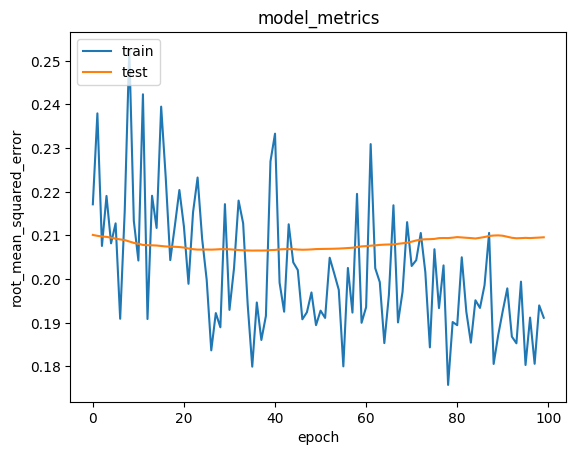

In [94]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dari visualisasi proses training model di atas cukup smooth dan model konvergen pada epochs sekitar 100. Dari proses ini, kita memperoleh nilai error akhir sebesar sekitar 0.19 dan error pada data validasi sebesar 0.20.

***Mendapatkan Rekomendasi movie***





In [95]:
movie_df = movie_new
df = pd.read_csv('movie-recommendation-data/ml-latest-small/ratings.csv')


user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]


movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

untuk memperoleh rekomendasi movies, gunakan fungsi model.predict() dari library Keras dengan menerapkan kode berikut.

In [96]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.movie_name, ':', row.genre)

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.movie_name, ':', row.genre)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Showing recommendations for users: 470
movie with high ratings from user
--------------------------------
Braveheart (1995) : Action|Drama|War
Schindler's List (1993) : Drama|War
Ghost (1990) : Comedy|Drama|Fantasy|Romance|Thriller
Terminator 2: Judgment Day (1991) : Action|Sci-Fi
--------------------------------
Top 10 movie recommendation
--------------------------------
Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964) : Drama|Musical|Romance
Paths of Glory (1957) : Drama|War
Kolya (Kolja) (1996) : Comedy|Drama
Oscar and Lucinda (a.k.a. Oscar & Lucinda) (1997) : Drama|Romance
Two Family House (2000) : Drama
Adam's Rib (1949) : Comedy|Romance
Safety Last! (1923) : Action|Comedy|Romance
Into the Woods (1991) : Adventure|Comedy|Fantasy|Musical
Reefer Madness: The Movie Musical (2005) : Comedy|Drama|Musical
Black Mirror: White Christmas (2014) : Drama|Horror|Mystery|Sci-Fi|Thriller


Hasil yang ditunjukkan adalah rekomendasi film untuk pengguna berdasarkan data rating film. Berikut adalah interpretasi dari output yang diberikan:

### **Rekomendasi Berdasarkan Rating Tinggi dari Pengguna**
Pada bagian ini, ditampilkan film-film yang memiliki rating tinggi dari pengguna (mungkin film yang sangat disukai atau dihargai oleh pengguna tersebut):

1. **Braveheart (1995)**: Genre *Action, Drama, War*  
   - Film sejarah yang menggambarkan perjuangan William Wallace untuk kebebasan Skotlandia. Dikenal dengan aksi dan dramanya yang emosional.
   
2. **Schindler's List (1993)**: Genre *Drama, War*  
   - Film yang mengisahkan kisah nyata Oskar Schindler yang menyelamatkan lebih dari seribu orang Yahudi selama Holocaust, terkenal dengan kedalaman dramatis dan sejarahnya.
   
3. **Ghost (1990)**: Genre *Comedy, Drama, Fantasy, Romance, Thriller*  
   - Film romantis dengan elemen fantasi, di mana seorang pria yang telah meninggal berusaha melindungi kekasihnya melalui dunia roh.
   
4. **Terminator 2: Judgment Day (1991)**: Genre *Action, Sci-Fi*  
   - Film aksi dan fiksi ilmiah yang menampilkan perjalanan waktu, teknologi canggih, dan pertarungan untuk masa depan umat manusia.

### **Top 10 Rekomendasi Film**
Bagian ini menampilkan daftar film-film yang direkomendasikan berdasarkan algoritma atau data yang tersedia. Rekomendasi ini mungkin didasarkan pada preferensi pengguna atau kesamaan genre dengan film yang telah mereka tonton atau nilai tinggi.

1. **Umbrellas of Cherbourg, The (1964)**: Genre *Drama, Musical, Romance*  
   - Sebuah film musikal Perancis yang penuh warna, tentang kisah cinta yang terhalang oleh perang.
   
2. **Paths of Glory (1957)**: Genre *Drama, War*  
   - Film perang yang menggambarkan ketegangan dan ketidakadilan dalam perang dunia pertama.
   
3. **Kolya (1996)**: Genre *Comedy, Drama*  
   - Komedi-drama tentang seorang pria yang mengambil alih perawatan seorang anak kecil dari Rusia setelah runtuhnya Uni Soviet.
   
4. **Oscar and Lucinda (1997)**: Genre *Drama, Romance*  
   - Drama romantis yang mengisahkan dua orang yang memiliki keyakinan dan impian yang sama, namun menghadapi berbagai tantangan dalam hidup mereka.
   
5. **Two Family House (2000)**: Genre *Drama*  
   - Film yang menceritakan kehidupan dua keluarga yang memiliki dinamika yang rumit dan penuh konflik.
   
6. **Adam's Rib (1949)**: Genre *Comedy, Romance*  
   - Komedi klasik yang menceritakan pasangan suami-istri yang bekerja sebagai pengacara dan terlibat dalam perselisihan profesional yang menyentuh kehidupan pribadi mereka.
   
7. **Safety Last! (1923)**: Genre *Action, Comedy, Romance*  
   - Film komedi dengan adegan aksi, terkenal dengan urutan terkenal aktor Harold Lloyd yang memanjat gedung pencakar langit.
   
8. **Into the Woods (1991)**: Genre *Adventure, Comedy, Fantasy, Musical*  
   - Sebuah film musikal yang menggabungkan elemen fantasi dan petualangan, dengan cerita yang mengaitkan berbagai cerita dongeng terkenal.
   
9. **Reefer Madness: The Movie Musical (2005)**: Genre *Comedy, Drama, Musical*  
   - Sebuah parodi musikal dari film propaganda tahun 1936 yang mengkritik penggunaan ganja, disajikan dengan humor dan absurditas.
   
10. **Black Mirror: White Christmas (2014)**: Genre *Drama, Horror, Mystery, Sci-Fi, Thriller*  
    - Sebuah episode spesial dari serial *Black Mirror* yang menggabungkan elemen horor, misteri, dan fiksi ilmiah dengan tema teknologi dan dampaknya pada kehidupan manusia.

### Kesimpulan:
- **Film dengan Rating Tinggi** adalah film yang sudah mendapatkan banyak penghargaan atau disukai oleh banyak orang, mungkin berdasarkan data pengguna atau rating tinggi.
- **Top 10 Rekomendasi** berisi film-film dengan genre dan tema yang beragam yang direkomendasikan kepada pengguna berdasarkan preferensi atau algoritma rekomendasi yang diterapkan, yang bertujuan untuk memberikan pengalaman menonton yang sesuai dengan minat mereka.

Output ini bisa digunakan untuk memberi saran kepada pengguna mengenai film-film yang mungkin mereka sukai berdasarkan data yang ada.